<h1><center> Trabajo Práctico 2 </center></h1>
<h1><center> Estimación espectral</center></h1>

|           Nombre          | Padrón |    Correo electrónico    |
|:-------------------------:|:------:|:------------------------:|
|     Aldana Mogilewski     |  98770 |  amogilewski@fi.uba.ar   |
| Maximiliano Gaston Pintos |  99711 |    gmpintos@fi.uba.ar    |
|        Juan Ignacio Romero        |  99572 |    jiromero@fi.uba.ar    |
|      Rodrigo Vazquez      |  98934 |    rvazquez@fi.uba.ar    |


## Resumen: 


## Objetivo:
Estudiar el comportamiento de algunos estimadores usuales de la densidad espectral de potencia (PSD) para procesos estocásticos ESA en tiempo discreto y establecer una comparación entre técnicas paramétricas y no paramétricas de estimación espectral.


## 1. Técnicas no paramétricas

####Ejercicio 1 - Estimador sesgado e insesgado de la autocorrelación
**Genere un secuencia de 10000 realizaciones de ruido blanco gaussiano media nula y varianza unitaria. Estime las secuencias de autocovarianza utilizando los estimadores sesgado e insesgado de la correlación. Grafique ambos estimadores, el insesgado primero y arriba el sesgado. Compárelos con la autocovarianza teórica del ruido. ¿Qué observa y por qué? **

Para estimar las secuencias de autocovarianza utilizando los estimadores sesgado e insesgado de la correlación considero los etimadores de la autocorrelación:

El estimador insesgado de la autocorrelacion se define como:

\begin{equation}
\hat{R_Y}(k)_{insesgado}=\frac{1}{N-k}
\sum_{n=k+1}^{N} Y(n)Y(n-k)  \quad 0 \leq k \leq N-1
\end{equation}

El estimador sesgado de la autocorrelacion se define como:


\begin{equation}
\hat{R_Y}(k)_{sesgado}=\frac{1}{N}
\sum_{n=k+1}^{N} Y(n)Y(n-k)  \quad 0 \leq k \leq N-1
\end{equation}

Luego considerando que las muestras son ruido blanco gaussiano $W$, de media nula y varianza unitaria, es un roceso ESA se puede hallar una relación lineal entre la autocorrelación y la autocovariazo misma:


\begin{equation}
C_W(t)=\mathbb{E}[W(t)W(t+\tau)]-\mathbb{E}[w(T)]\mathbb{E}[W(t+\tau)]=R_W(t)
\end{equation}

Ademas, como las variables son independientes para $ t>0$, se cumple que:
$C_W(t) = R_W(t) = \delta_{k,0}$

Con lo cual reemplazamos en las formulas anteriores, obteniendo asi los estimadores para la autocorrelacion:

\begin{equation}
\hat{C_Y}(k)_{insesgado}=\frac{1}{N-k}
\sum_{n=k+1}^{N} Y(n)Y(n-k)  \quad 0 \leq k \leq N-1
\end{equation}

\begin{equation}
\hat{C_Y}(k)_{sesgado}=\frac{1}{N}
\sum_{n=k+1}^{N} Y(n)Y(n-k)  \quad 0 \leq k \leq N-1
\end{equation}








In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
import scipy.signal as sig
plt.style.use("seaborn-deep")

In [ ]:
N = int(10e3)

W = np.random.randn(N + 1) # generamos 10001 muestras, de manera de simplificar el codigo subsiguiente

#Estimador insesgado de la autocorrelacion (como media nula, es de la autocovarianza)

def r_insesgado(k,N):

    suma = 0
    n = k + 1

    while (k + 1 <= n <= N):
        suma += W[n] * W[n-k]
        n += 1

    suma = suma / (N-k)

    return suma

#Estimador sesgado (no usado porque hay una forma mas eficiente)

#def r_sesgado(k,N):
#    return (N-k)*r_insesgado(k,N)/N



In [ ]:
R_insesgado = np.zeros(N, dtype=float)
R_sesgado = np.zeros(N, dtype=float)

for k in range(N):
    R_insesgado[k]= r_insesgado(k,N)
    R_sesgado[k]  = R_insesgado[k]*(N-k)/N

<Figure size 432x288 with 0 Axes>

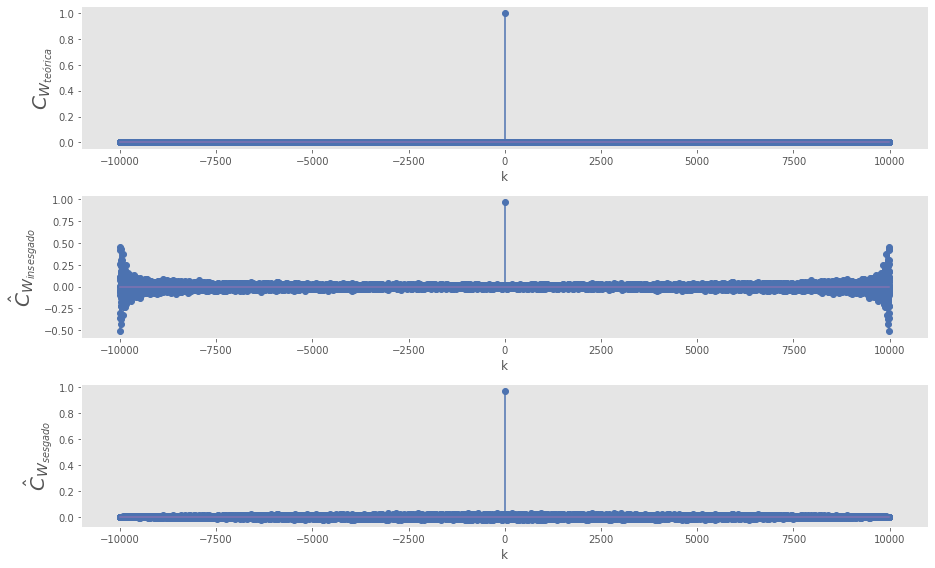

In [ ]:
k = np.arange(-(N-1),N)

def mirror(vector):
    l = len(vector)
    vector_r = np.zeros(l-1)

    for i in range(l-2):
        vector_r[i] = vector[l-1-i]

    return np.append(vector_r,vector)

R_teorico = np.zeros(2*N-1)
R_teorico[N] = 1

R_insesgado_plot = mirror(R_insesgado)
R_sesgado_plot = mirror(R_sesgado)

plt.figure(0)
fig, axs = plt.subplots(3, 1,figsize=(13,8))
axs[0].stem(k,R_teorico,use_line_collection=True)
axs[0].grid(which='both')
axs[0].set_xlabel('k')
axs[0].set_ylabel(r'$C_{W_{teórica}}$', fontsize=20)

axs[1].stem(k,R_insesgado_plot,use_line_collection=True)
axs[1].grid(which='both')
axs[1].set_xlabel('k')
axs[1].set_ylabel(r'$\hat{C}_{W_{insesgado}}$', fontsize=20)

axs[2].stem(k,R_sesgado_plot,use_line_collection=True)
axs[2].grid(which='both')
axs[2].set_xlabel('k')
axs[2].set_ylabel(r'$\hat{C}_{W_{sesgado}}$', fontsize=20)

fig.tight_layout()
plt.show()



El estimador sesgado es mejor estiamodr que el insesgado como puede verse en los graficos. El estimador sesgado muestra una homogeneidad a medida que aumentan las muestras a diferencia del estiamodr insesgado que en los extremos muestra un comportamiento erratico.

### Ejercicio 2 - (In)consistencia del periodograma

Considerando un sistema LTI, cuya transferencia responde a:

\begin{equation}
H(z) = \dfrac{1-1,3817z^{-1} + 1,5632z^{-2} - 0,8843 z^{-3} + 0,4096z^{-4}}{1 + 0,3544z^{-1} + 0,3508z^{-2} ´0,1736z^{-3} + 0,2401z^{-4}}
\end{equation}

Asumiento que el sistema es excitado por ruido blanco gaussiano de media nula y varianza unitaria, denotado como $\{X_n\}_n$, dando lugar a una señal:

\begin{equation}
Y(n) = (h * X)(n)
\end{equation}

Denotando como $N$ al número de muestras disponibles del proceso $X$ y considerando el estimador de Backman-Tukey:

\begin{equation}
\hat{S_{BT}}(e^{jw}) = \sum_{k=-(M-1)}^{M-1} w(k)\hat{R}(k)e^{-jwk}
\end{equation}

Tomando $w(k) = 1  \, \forall \, k$ y M=N se tiene el periodigrama o correlograma clásico.

#### Grafique la verdadera densidad espectral de potencia de $Y$, $S_Y$

A partir del teorema de Wiener-Khintchine y propiedades de los sistemas LTI, se puede obtener la verdadera densidad espectral de potencia de $Y$, denotada como $S_Y(w)$.

Teniendo la transferencia, $H$, la cual define a un sistema LTI, se puede escribir:

\begin{equation}
S_Y(e^{jw}) = \mathcal{F}\{ R_Y[n] \} = |H(e^{j\Omega})|^2S_X(e^{j\Omega})
\end{equation}

Al $X$ ser un proceso de ruido blanco, con varianza unitaria $S_X(e^{j\Omega}) = 1$, 

\begin{equation}
\Rightarrow S_Y(e^{jw}) = |H(e^{j\Omega})|^2
\end{equation}

Los polos y ceros de la transferencia resultan 

\begin{equation}
ceros = \left \{ \begin{matrix}c_{1,2} =  0,124382 \pm j \, 0,787814 & 
\\ c_{3,4} = 0,569168 \pm j \, 0,565664 & \end{matrix}\right. 
\\ 

polos = \left \{ \begin{matrix} p_{1,2} = 0,317786 \pm j \, 0,623680 & 
\\ p_{3,4} = -0,494986 \pm j \, 0,494998 & \end{matrix}\right. 

\end{equation}

Utilizando estos resultados, la transferencia se puede expresar como:
\begin{equation}
H(z) = \dfrac{(z-c_1)(z-\overline{c_1})(z-c_3)(z-\overline{c_3})}{(z-p_1)(z-\overline{p_1})(z-p_3)(z-\overline{p_3})}
\end{equation}

Y su cuadrado resulta:
\begin{equation}
|H(z)|^2 = \dfrac{|(z-c_1)(z-\overline{c_1})(z-c_3)(z-\overline{c_3})|^2}{|(z-p_1)(z-\overline{p_1})(z-p_3)(z-\overline{p_3})|^2}
\end{equation}

Finalmente, la verdadera densidad espectral de potencia de $Y$:
\begin{equation}
S_Y(e^{j\Omega}) = \dfrac{|(e^{j\Omega}-c_1)(e^{j\Omega}-\overline{c_1})(e^{j\Omega}-c_3)(e^{j\Omega}-\overline{c_3})|^2}{|(e^{j\Omega}-p_1)(e^{j\Omega}-\overline{p_1})(e^{j\Omega}-p_3)(e^{j\Omega}-\overline{p_3})|^2}
\end{equation}

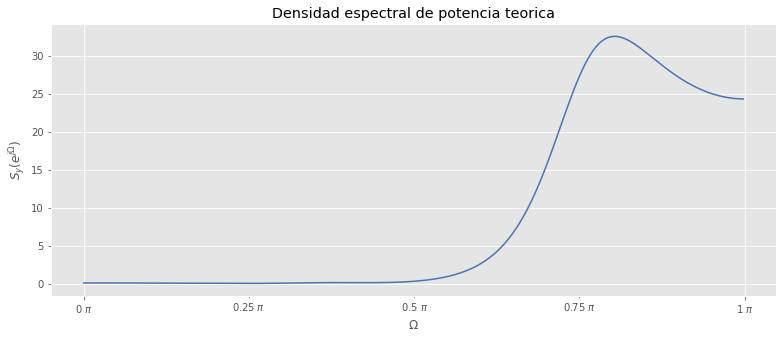

In [ ]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import cmath

num_h = [1,-1.3817,1.5632,-0.8843,0.4096]
den_h = [1,0.3544,0.3508,0.1736,0.2401]

w,h = sig.freqz(num_h, den_h)

plt.figure(figsize=(13,5))
plt.plot(w/np.pi,np.abs(h)**2)
# naming the x axis 
plt.xlabel('$\Omega$') 
# naming the y axis 
plt.ylabel('$S_y(e^{j\Omega})$') 
# giving a title to my graph 
plt.title('Densidad espectral de potencia teorica') 

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

plt.show()

#### Periodigrama promedio y varianza

Generando J = 100 realizaciones de largo N = 64 y N = 512 de X, se obtuvo el periodigrama correspondiente a cada realizacion de X. De esta forma, se obtuvieron el periodigrama promedio y su varianza.

El periodigrama promedio se obtiene como:
\begin{equation}
\overline{\hat{S}}Y(e^{j\Omega} = \dfrac{1}{J} \sum{i=1}^J \hat{S}_{Y,i}(e^{j\Omega})
\end{equation}

Y la varianza del periodigrama se obtiene como:
\begin{equation}
\sigma^2_{S_Y} (e^{j\Omega}) = \dfrac{1}{J-1} \sum_{i=1}^J \left( \hat{S}_{Y,i}(e^{j\Omega}) - \overline{S}_Y (e^{j\Omega}) \right)
\end{equation}

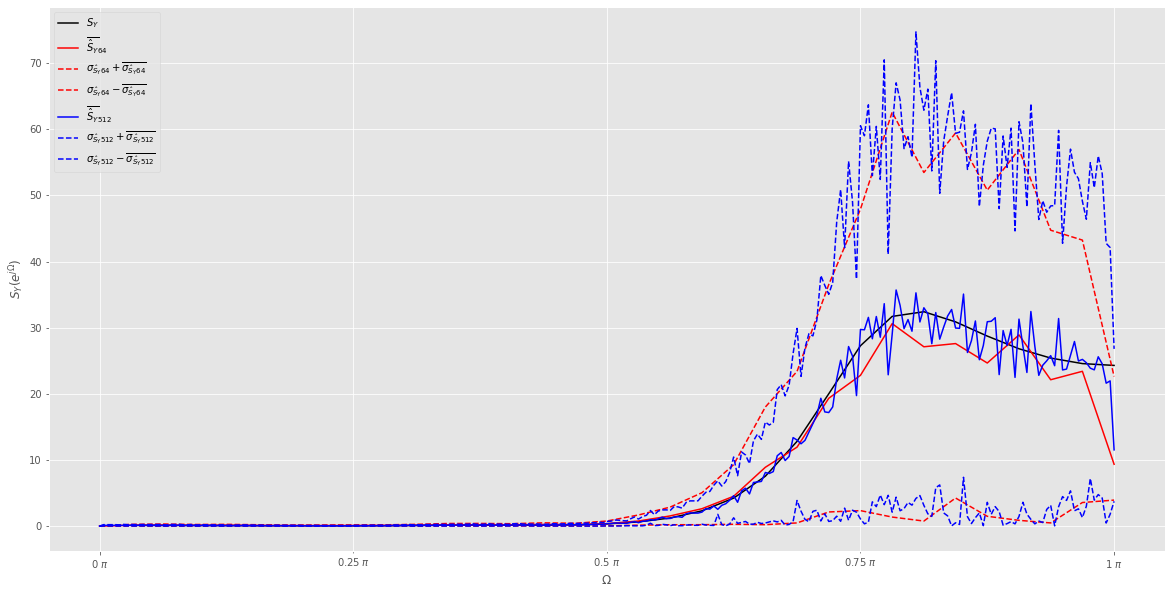

In [ ]:
def periodograma(signal):

    R_signal = np.correlate(signal, signal, mode='full')/N # clave linea
    lr = len(R_signal)
    step = 2*np.pi/lr
    omega = np.arange(-np.pi, np.pi + step, step)
    ka = np.arange(-(lr/2-1),(lr/2-1))
    ese = np.zeros(lr+1, dtype=complex)

    for i in range(len(ka)):
        ese += R_signal[i]*np.exp(-1j*omega*ka[i])

    return ese

# Defino la transferencia:
H = lambda z: (1 - 1.3817 * z**(-1)+ 1.5632 * z**(-2) - 0.8843 *z**(-3) + 0.4096 * z **(-4))/(1 + 0.3544 *z**(-1)+ 0.3508 * z**(-2) + 0.1736 *z**(-3) + 0.2401 * z **(-4))

#genero las N muestras del ruido J veces
J = 100

#muestreos de N en vectores columna
W_64 = np.random.randn(64, J)
W_256 = np.random.randn(256, J)
W_512 = np.random.randn(512, J)
#respuestas al filtro en vectores columna
Y_64 = np.zeros((64,J))
Y_256 = np.zeros((256,J))
Y_512 = np.zeros((512,J))
#periodogramas de las respuestas al filtro en vectores columna
Sy_i_64 = np.zeros((int(64/2)+1,J), dtype=complex)
Sy_i_256 = np.zeros((int(256/2)+1,J), dtype=complex)
Sy_i_512= np.zeros((int(512/2)+1,J), dtype=complex)
#periodograma promedio de respuestas al filtro en vectores columna
mean_S64 = np.zeros(int(64/2)+1, dtype=complex)
mean_S256 = np.zeros(int(256/2)+1, dtype=complex)
mean_S512= np.zeros(int(512/2)+1, dtype=complex)
#varianza de los espectrogramas respuestas al filtro en vectores columna
var_S64  = np.zeros(int(64/2)+1, dtype=complex)
var_S256 = np.zeros(int(256/2)+1, dtype=complex)
var_S512 = np.zeros(int(512/2)+1, dtype=complex)

omega_512 = np.arange(-np.pi, np.pi + 2*np.pi/512, 2*np.pi/512)
omega_256 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)
omega_64 = np.arange(-np.pi, np.pi + 2*np.pi/64, 2*np.pi/64)

#paso las J muestras por el filtro

for i in range(J):
    Y_64[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_64[:,i])
    Y_256[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_256[:,i])
    Y_512[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_512[:,i])

#periodogramas de las J muestras


for i in range(J):
    omega_64, aux  = sig.periodogram(Y_64[:,i], fs=200*np.pi, scaling='density')
    Sy_i_64[:,i]  += aux
    omega_256, aux  = sig.periodogram(Y_256[:,i], fs=200*np.pi, scaling='density')
    Sy_i_256[:,i]  += aux
    omega_512, aux = sig.periodogram(Y_512[:,i], fs=200*np.pi, scaling='density')
    Sy_i_512[:,i] += aux

omega_64 /= J
omega_256 /= J
omega_512 /= J

#periodograma promedio

for i in range(J):
    mean_S64 += Sy_i_64[:,i]
    mean_S256 += Sy_i_256[:,i]
    mean_S512+= Sy_i_512[:,i]

mean_S64 /= J
mean_S256 /= J
mean_S512 /= J

#varianza del espectrograma

for i in range(J):
    var_S64 += np.power(Sy_i_64[:,i]-mean_S64,2)
    var_S256 += np.power(Sy_i_256[:,i]-mean_S256,2)
    var_S512+= np.power(Sy_i_512[:,i]-mean_S512,2)

var_S64 = var_S64/(J-1)
var_S256 = var_S256/(J-1)
var_S512 = var_S512/(J-1)


#w_512, Sy_512 = sig.periodogram(Y_512, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=False, scaling='density', axis=-1)


#S(e^jw), ^S(e^jw) +- sigma ^S

cons = 10*np.pi

step = np.pi/32
w = np.arange(step, np.pi+step, step)

plt.figure(figsize=(20,10))

plt.plot(w/np.pi,np.abs(H(np.exp(w*1j)))**2, 'k',label="$S_Y$")

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64), 'r',label="$\overline{\hat{S}_Y}_{64}$")

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64 + np.sqrt(var_S64)),'--r',label= r"$\sigma_{\hat{S}_Y  64} + \overline{\sigma_{\hat{S}_Y 64}}$")

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64 - np.sqrt(var_S64)),'--r',label="$\sigma_{\hat{S}_Y 64} - \overline{\sigma_{\hat{S}_Y 64}}$")

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512), 'b', label="$\overline{\hat{S}_Y}_{512}$")

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512 + np.sqrt(var_S512)), '--b',label="$\sigma_{\hat{S}_Y  512} + \overline{\sigma_{\hat{S}_Y  512}}$")

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512 - np.sqrt(var_S512)), '--b',label="$\sigma_{\hat{S}_Y  512} - \overline{\sigma_{\hat{S}_Y  512}}$")

plt.legend(loc='best')
plt.xlabel(r"$\Omega$")
plt.ylabel("$S_Y(e^{j\Omega})$")
plt.grid(True, which="both", ls="-")

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

#plt. yticks(np.arange(0.4, 1.9, step=0.1))

Podemos observar como el periodograma, a medida que aumenta la cantidad de muestras, la varianza conserva su forma.

Bajo las mismas condiciones, se realizo el siguiente grafico para $N=256$ esta vez utilizando una ventana de Bartlett triangular con $M=\frac{N}{4}$ y $M=\frac{N}{16}$:

\begin{equation}
w(k)=\Big(1-\frac{|k|}{M}\Big) \mathbb{1}\{|k|<M\}
\end{equation}


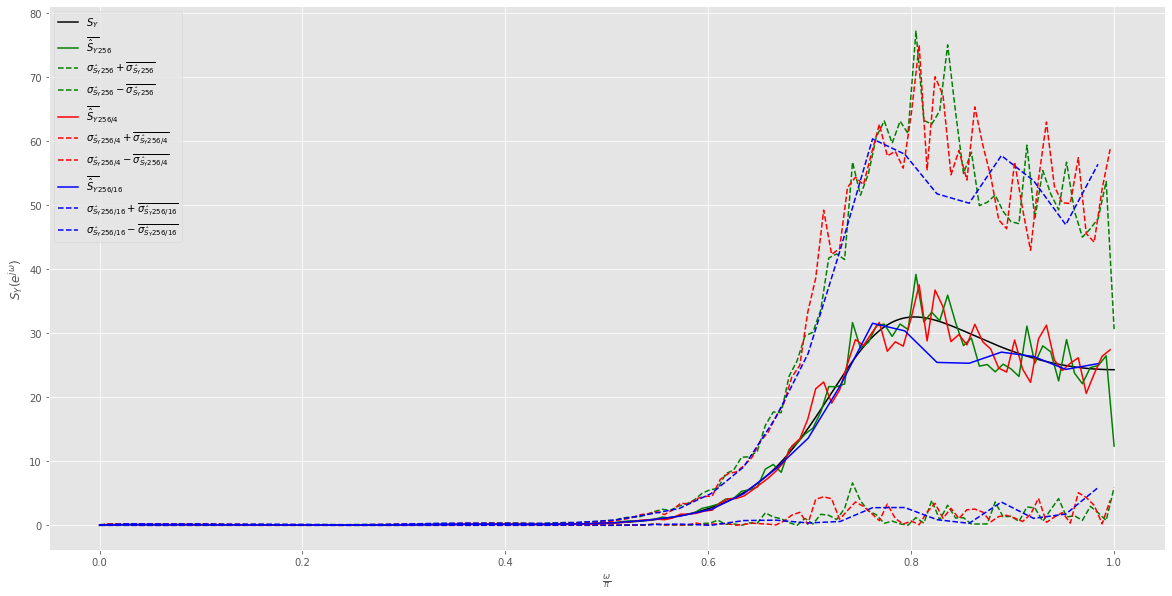

In [ ]:

#genero las N muestras del ruido J veces
J = 100

#muestreos de N en vectores columna
W_256 = np.random.randn(256, J)
#respuestas al filtro en vectores columna
Y_256 = np.zeros((256,J))
#periodogramas de las respuestas al filtro en vectores columna
Sy_i_256_4= np.zeros((int(256/2),J), dtype=complex)
Sy_i_256_16= np.zeros((int(64/2),J), dtype=complex)
#periodograma promedio de respuestas al filtro en vectores columna
mean_S256_4= np.zeros(int(256/2), dtype=complex)
mean_S256_16= np.zeros(int(64/2), dtype=complex)
#varianza de los espectrogramas respuestas al filtro en vectores columna
var_S256_4 = np.zeros(int(256/2), dtype=complex)
var_S256_16= np.zeros(int(64/2), dtype=complex)

omega_256_4 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)
omega_256_16 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)

#paso las J muestras por el filtro


for i in range(J):
    Y_256[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401], W_256[:,i])

#periodogramas de las J muestras

nfft_4=4*64-1
nfft_16=4*16-1

window_4=np.bartlett(nfft_4)
window_16=np.bartlett(nfft_16)

#period(nfft=2*M1-1)

for i in range(J):
    omega_256_4, aux = sig.periodogram(Y_256[:,i], nfft=nfft_4, fs=200*np.pi, scaling='density', window='bartlett')
    Sy_i_256_4[:,i] += aux
    omega_256_16, aux = sig.periodogram(Y_256[:,i], nfft=nfft_16, fs=200*np.pi, scaling='density', window='bartlett')
    Sy_i_256_16[:,i] += aux

omega_256_4 /= J
omega_256_16 /= J

#periodograma promedio

for i in range(J):
    mean_S256_4+= Sy_i_256_4[:,i]
    mean_S256_16+= Sy_i_256_16[:,i]

mean_S256_4 /= J
mean_S256_16 /= J

#varianza del espectrograma

for i in range(J):
    var_S256_4  += np.power(Sy_i_256_4[:,i]-mean_S256_4, 2)
    var_S256_16 += np.power(Sy_i_256_16[:,i]-mean_S256_16, 2)

var_S256_4  = var_S256_4/(J-1)
var_S256_16 = var_S256_16/(J-1)

#w_512, Sy_512 = sig.periodogram(Y_512, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=False, scaling='density', axis=-1)

#S(e^jw), ^S(e^jw) +- sigma ^S

cons = 10*np.pi

step = np.pi/1024
w = np.arange(step, np.pi+step, step)

plt.figure(figsize=(20,10))

plt.plot(w/np.pi,np.abs(H(np.exp(w*1j)))**2, 'k',label="$S_Y$")

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256), 'g',label="$\overline{\hat{S}_Y}_{256}$")

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256 + np.sqrt(var_S256)),'--g',label= r"$\sigma_{\hat{S}_Y  256} + \overline{\sigma_{\hat{S}_Y 256}}$")

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256 - np.sqrt(var_S256)),'--g',label= r"$\sigma_{\hat{S}_Y  256} - \overline{\sigma_{\hat{S}_Y 256}}$")

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4), 'r',label="$\overline{\hat{S}_Y}_{256/4}$")

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4 + np.sqrt(var_S256_4)), '--r',label= r"$\sigma_{\hat{S}_Y  256/4} + \overline{\sigma_{\hat{S}_Y 256/4}}$")

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4 - np.sqrt(var_S256_4)), '--r',label= r"$\sigma_{\hat{S}_Y  256/4} - \overline{\sigma_{\hat{S}_Y 256/4}}$")

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16), 'b', label="$\overline{\hat{S}_Y}_{256/16}$")

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16 + np.sqrt(var_S256_16)),'--b',label= r"$\sigma_{\hat{S}_Y  256/16} + \overline{\sigma_{\hat{S}_Y 256/16}}$")

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16 - np.sqrt(var_S256_16)), '--b',label= r"$\sigma_{\hat{S}_Y  256/16} - \overline{\sigma_{\hat{S}_Y 256/16}}$")
plt.legend(loc='best')
plt.xlabel(r"$\frac{\omega}{\pi}$")
plt.ylabel(r"$S_Y(e^{j\omega})$")
plt.grid(True, which="both", ls="-")

## 2. Técnicas paramétricas


####2.4 Ejercicio Teórico

**Demuestre que la ecuación, es decir, la varianza de ruido estimada por máxima verosimilitud es:**
 \begin{equation}
 \hat{\sigma^2_{W, MV}} = \frac{||y-Y^T \hat{a}_{MV}}{N-m}
 \end{equation}

La autocorrelación de un proceso autoregresivo excitado por ruido blanco satisface las ecuaciones de Yule-Walker. Con los estimados ${aˆ1, . . . , aˆm}$ usando la ecuación de Yule-Walker para n = 0 se puede estimar la varianza del ruido como:

\begin{equation}
\hat{\sigma^2_W} = \hat{R_Y}(0)-\sum^m_{k=1} \hat{a_i} \hat{R_Y}(-k)
\end{equation}

Sin embargo, dado que se desconoce el orden del modelo, se propone es estimar el orden del modelo utilizando el criterio de información de Akaike.

Para simplificar el problema de hallar el estimador de máxima verosimilitud asumiremos que las primeras m muestras de Y son fijas, actuan como condiciones iniciales para la ecuación en diferencias del proceso AR-m. 
Por lo tanto las muestras que se consideran aleatorias son $Y (m + 1), . . . , Y (N)$. El vector de parámetros a estimar es el vector $θ = [\sigma^2_W, a_1, ..., a_m]$. 
La función de máxima verosimilitud de θ es la densidad conjunta de las muestras ${Y (m + 1), . . . , Y (N)}$. 

\begin{equation}
L(θ) = f^{(θ)}_{Y(N),...,Y (m+1)}(y(n), . . . , y(m + 1)).
\end{equation}

El estimador de máxima verosimilitud de θ es el que maximiza L(θ), es decir:
\begin{equation}
\hat{θ}_{MV} = θ^*:L(θ^*) es máxima. 
\end{equation}

Por lo tanto la función de verosimilitud de $θ =[σ^2_W , a]$ es:

\begin{equation}
L(a, σ^2_W ) = \frac{1}{(2πσ^2_W)^{\frac{N−m}{2}}}exp\Big(
-\frac{1}{σ^2_W}||y − Y^T a||^2\Big)
\end{equation}

Para maximizar la función respecto de θ podemos maximizar en su lugar su logaritmo natural:

\begin{equation}
log L(a, σ^2_W ) = −\frac{N−m}{2}log(2πσ^2_W)-||y˜ −Y^T a||^2
\end{equation}

Luego, el valor del estimador de a independiente de la varianza del ruido, y que el valor que maximiza $log L(a, σ^2_W )$ es aquel que minimiza $||y˜ −Y^T a||^2$. Esto implica que el estimador MV de a, aˆMV, es la solución por cuadrados mínimos del sistema:
\begin{equation}
y = Y^T a
\end{equation}
y debe satisfacer la ecuación normal:
\begin{equation}
Y Y^T aˆ{MV} = Yy
\end{equation}
Si $YY^T$ es inversible existe una única solución:
\begin{equation}
aˆ{MV} = (Y Y^T)^{−1}Yy
\end{equation}
Una vez obtenido $aˆ{MV}$, puede obtenerse el estimador de la varianza, derivando la función
$log L(a, σ^2_W )$, y se obtiene:
\begin{equation}
 \hat{\sigma^2_{W, MV}} = \frac{||y-Y^T \hat{a}_{MV}}{N-m}
 \end{equation}




#### Ejercicio 3 - Comparación entre el periodograma puro y el estimador de Welch
Genere dos gráficos, para N = 1000 y 5000, y en cada uno de ellos grafique en dB superpuestos una realización del periodograma, el estimador de Welch y la PSD verdadera (en
ese orden). Para N = 1000 en el estimador de Welch utilice segmentos de 50 muestras con solapamiento del 50 %, y en N = 5000 use ventanas de 250 muestras con solapamiento de
del 50 %. En todos los casos utilice una FFT de 5000 puntos. Utilice la misma realización de las muestras en el mismo gráfico.

1. Compare el comportamiento del periodograma para los dos valores de N. ¿Nota alguna mejora al utilizar más muestras? ¿Por qué?
2. Compare el comportamiento del estimador de Welch con el del periodograma. ¿Cuál presenta menor varianza? ¿Qué se pierde al reducir la varianza?



In [ ]:
#paquetes, no copiar al notebook final

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
from scipy import signal

plt.style.use("seaborn-deep")

In [ ]:
#Calculos

num_h = [1, -1.3817, 1.5632, -0.8843, ]
den_h = [1, 0.3544, 0.3508, 0.1736, 0.2401]

den_H = lambda z: 1/(1+ 0.3544 * z**(-1)+ 0.3588 * z**(-2)+ 0.1736 * z**(-3)+ 0.2401 * z**(-4))

N1k = 1000
N5k = 5000

w = np.linspace(0,np.pi,2*N5k) #defino valores de dominio del espectro

# salidas de los procesos
Y1k = signal.lfilter([1], den_h, np.random.randn(N1k))
Y5k = signal.lfilter([1], den_h, np.random.randn(N5k))


# periodogramas
w1k_p, Sy1k_p = signal.periodogram(Y1k, fs=2)
w5k_p, Sy5k_p = signal.periodogram(Y5k, fs=2)


# welch
w1k_w, Sy1k_w = signal.welch(Y1k, nperseg=50,noverlap=25, nfft=5000, fs=2)
w5k_w, Sy5k_w = signal.welch(Y5k, nperseg=250,noverlap=125, nfft=5000, fs=2)

In [ ]:
# Grafico para N = 1000

plt.figure(figsize=(16,9))


plt.plot(w1k_p, 10*np.log10(Sy1k_p), linewidth=0.5, label="Periodograma de N=1000")
plt.plot(w1k_w, 10*np.log10(Sy1k_w), linewidth=2, label="Welch de N=1000")
plt.plot(w/np.pi,10*np.log10(np.abs(den_H(np.exp(w*1j)))**2),linewidth=2,label="$S_Y$")
plt.ylim(-35,15)
plt.legend(loc='best')
plt.grid(which='both')
plt.xlabel("$\Omega$",fontsize=14)
plt.ylabel("$S_Y(e^{j\Omega})\ [dB] $",fontsize=14)


#acomodo ejes
ax = plt.gca()
#pone ejes en unidades de ppi y ubica ticks 
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.2))
plt.show()

In [ ]:
# Grafico para N = 5000

plt.figure(figsize=(16,9))


plt.plot(w5k_p, 10*np.log10(Sy5k_p), linewidth=0.2, label="Periodograma de N=5000")
plt.plot(w5k_w, 10*np.log10(Sy5k_w), linewidth=2, label="Welch de N=5000")
plt.plot(w/np.pi,10*np.log10(np.abs(den_H(np.exp(w*1j)))**2),linewidth=2,label="$S_Y$")
plt.ylim(-35,15)
plt.legend(loc='best')
plt.grid(which='both')
plt.xlabel("$\Omega$",fontsize=14)
plt.ylabel("$S_Y(e^{j\Omega})\ [dB] $",fontsize=14)


#acomodo ejes
ax = plt.gca()
#pone ejes en unidades de ppi y ubica ticks 
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.2))
plt.show()

Se confecionaron 2 graficos, con N=1000 y otro con N=5000. En la misma imagen aparecen superpuestos el estimador el periodograma, el estimador de Welch y la PSD real.
Para la simulacion con N=1000 se utilizo una ventana 50 muestras con solapamiento del 50% y para N=5000, la ventana fue de 250 muestras con 50% de solapamiento. Para ambos cassos la FFT fue de 5000 puntos.

Para el caso del periodograma, su inconsistencia es muy grande como para notar mejoras al aumentar la cantidad de muestras, puesto que su varianza no disminuye al hacerlo.
Comparando el estimador de Welch con el periodograma, se puede observar que este ultimo presenta una varianza tremendamente menor, esto es claro al ver que se ajusta bastante bien a la PSD teorica.
Cuando se reduce la varianza del estimador de Welch, es necesario utilizar una ventana mas ancha, conservando el solapamiento, esto hace que la cantidad de puntos se vea reducida. Asumiendo asi un compromiso entre ganancia resolucion a costa de un aumento en la varianza


####Ejercicio 4 - Comparación entre el estimador MV y el estimador de Welch

Para N = 1000 genere una realización de las muestras de Y y utilícela para obtener el
estimador de Welch y el estimador MV de orden 1 ≤ m ≤ 10. Utilice la métrica de Akaike
para determinar el orden del modelo.

In [ ]:
#paquetes, no copiar al notebook final

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
from scipy import signal

plt.style.use("seaborn-deep")

In [ ]:
#Funciones 
N = 1000

def davuelta(vector):
    l = len(vector)
    vectorAlreves = np.zeros(l)

    for i in range(l):
        vectorAlreves[i] = vector[l-i-1]

    return vectorAlreves

def generaVec(vector, orden):
    return davuelta(vector[orden:])

#generador de cada fila de la matriz A
def generaFila(vector,orden,n):
    fil = np.zeros(orden)

    for j in range(orden):
        fil[j] = vector[n-j] #fil[j] = vector[n-j-1]
    return fil

# ya se genera transpuesta
def generaMat(vector,orden):
    Ymat = np.zeros([N-orden,orden])
    for i in range(N-orden):
        Ymat[i:] = generaFila(vector,orden,N-2-i)
    return Ymat

def a_mv(Ymat, yvec):
    (a_est, res, rangoY, sin_val) = np.linalg.lstsq(Ymat, yvec,rcond=None)
    return a_est

def varMv(a_mv,Ymat,yvec,orden):
    return np.power(np.linalg.norm(yvec-np.dot(Ymat,a_mv)),2)/(N-orden)

def MV(vector,orden):
    yvec = generaVec(vector,orden)
    Ymat = generaMat(vector,orden)
    a_est = a_mv(Ymat,yvec)
    var_est = varMv(a_est,Ymat,yvec,orden)
    return a_est,var_est

def getVarMV(orden,vectorVar):
    return vectorVar[orden-1]

def metricaAkaike(orden,var_mv_orden):
    return ((2*(orden+1)) + 2*N*(1+np.log10(2*np.pi*var_mv_orden)))

In [ ]:
#Calculos

num_h = [1, -1.3817, 1.5632, -0.8843, ]
den_h = [1, 0.3544, 0.3508, 0.1736, 0.2401]

#w = np.linspace(0,np.pi,5000) #defino valores de dominio del espectro

# salidas de los procesos
Y = signal.lfilter([1], den_h, np.random.randn(N))

w_welch, Sy_w = signal.welch(Y, nperseg=50, noverlap=25, nfft=5000, fs=2*np.pi) # genero estimador de Welch

#Armo matriz de coeficientes para MV
A_mv = np.zeros([100]).reshape(10,10)

#Armo vector de varianzas MV
Var_mv = np.zeros(10)

for orden in range(1,11):
    A_mv[orden-1, :orden], Var_mv[orden-1] = MV(Y, orden)

akaikeVec = np.zeros(10)
for orden in range(1,11):
    akaikeVec[orden-1] =  metricaAkaike(orden,getVarMV(orden,Var_mv))

minAkaike = np.where(akaikeVec == np.amin(akaikeVec))[0]+1
print("el modelo de menor metric de Akaike es:",minAkaike)
deltam = akaikeVec-np.amin(akaikeVec)
#delta
print("delta m:",deltam)

if minAkaike>4:
    print("repetir ejecucion, el orden no es minimo")
else:
    print("Estimacion correcta")

Sabiendo que las muestras provienen un AR-4, es coherente que el orden estimado por el criterio de Akaike haya dado tambien 4 con mayor frecuencia, se realizaron varias ejecuciones del programa hasta verificar el menor orden. Luego se realizara una simulacion de la ejecucion repetida, visualizando el histograma y las frecuencias de los resultados del orden estimado. \
Acerca de los coeficientes, el criterio de maxima verosimilitud fue utilizado para estimar los coeficientes del sistema original. Se puede ver que coinciden los coeficientes estimados por el criterio de Akaike con los de orden 4 

In [ ]:
# Coeficientes estimados de orden 4 coinciden con los de minAkaike

print("coeficientes del sistema estimado",-A_mv[int(minAkaike)-1, :int(minAkaike)],"orden",minAkaike)

print("varianza estimada por MV",Var_mv[minAkaike])
#ECUACION EN DIFERENCIAS
print("sistema AR-4 estimado:\n","Y(n)+"+str(-A_mv[int(minAkaike)-1, :int(minAkaike)][0])+" Y(n-1)+"+str(-A_mv[int(minAkaike)-1, :int(minAkaike)][1])+" Y(n-2)+"+str(-A_mv[int(minAkaike)-1, :int(minAkaike)][2])+" Y(n-3)+"+str(-A_mv[int(minAkaike)-1, :int(minAkaike)][3])+" Y(n-4)=W(n)"+str(Var_mv[minAkaike]))



Tabla de metricas de Akaike para cada orden $m$:

In [ ]:
# Tabla de metricas de Akaike para cada orden
print("orden\t","AIC(m)\t\t\t","delta(m)")
for orden in range(1,11):
    print(orden,'\t',akaikeVec[orden-1],'\t',deltam[orden-1])


El valor de la metrica $\Delta(m)$ indica el grado de soporte que le dan las muestras al modelo de orden $m$ en relacion al modelo elegido. Considerando que esa metrica, entre 0-2: sustancial.\
4-7: Considerablemente menos que el elegido\
\>10: Esencialmente ningun soporte empirico

Al ver que los ordenenes proximos al del minimo indice (m=5,6,7) tienen una diferencia metrica dentro de la categoria de *Considerablemente menos que el elegido* , indica que las muestras le dan un grado de soporte inferior en comparacion al orden obtenido ($m=4$). El resto de ordenenes no poseen soporte empirico.

In [ ]:
# graficos 4.3

w_teo, H_teo = signal.freqz([1],den_h) #calcula la respuesta en frecuencia teorica

w_min, H_min = signal.freqz(Var_mv[3],np.concatenate(([1],- A_mv[3,:4])))

w_ak, H_ak = signal.freqz([Var_mv[minAkaike-1]], np.concatenate(([1], -A_mv[int(minAkaike)-1, :int(minAkaike)])))

plt.figure(figsize=(25,10))
plt.plot(w_welch[1:len(w_welch)-1]/np.pi, 10*np.log10(np.pi*np.abs(Sy_w[1:len(w_welch)-1])), label = "Estimador de Welch")
plt.plot(w_teo/np.pi, 20*np.log10(np.abs(H_teo)), label="PSD teorica")
plt.plot(w_min/np.pi, 20*np.log10(np.abs(H_min)),label=" MV de orden "+str(int(minAkaike)))
plt.plot(w_ak/np.pi, 20*np.log10(np.abs(H_ak)),':k', label = "Akaike")
#estilo y ejes
plt.ylim(-8,5)
plt.legend(loc='best')
plt.grid(which='both')
plt.xlabel("$\Omega$",fontsize=14)
plt.ylabel("$S_Y(e^{j\Omega})\ [dB] $",fontsize=14)
#acomodo ejes
ax = plt.gca()
#pone ejes en unidades de ppi y ubica ticks 
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.2))
plt.show()

# Estimador de Welch, PSD verdadera y estimador de MV

En el grafico se muestran superpuestos el estimador de Welch, la PSD teorica y el estimador de MV de orden 4 y el de orden dado por la metrica de Akaike. Se puede apreciar que estos dos ultimos coinciden plenamente.

Notar como el hecho de modelar la señal a priori como AR-m, con orden desconocido, hace que la estimacion sea mejor (dado que la hipotesis AR-m sea correcta). Esto es, comparando con el Estimador de Welch, se ve que la estimacion de MV se aproxima mejor a la teorica y con menor varianza.

In [ ]:
# 4.4

N = 1000
it = 2000

ordenesVec = np.zeros(it)
for i in range(it):

    y = signal.lfilter([1], den_h, np.random.randn(N))
    Amv = np.zeros([100]).reshape(10,10)
    VARmv = np.zeros(10)
    for orden in range(1,11):
        Amv[orden-1,:orden], VARmv[orden-1] = MV(y, orden) 
    akaikeVec2 = np.zeros(10)
    for orden in range(1,11):
        akaikeVec2[orden-1] = metricaAkaike(orden, getVarMV(orden,VARmv))

    ordenesVec[i] = np.where(akaikeVec2 == np.amin(akaikeVec2))[0]+1

Para obtener mas informacion acerca del metodo de estimacion, se realizo una simulcion donde se calcula la estimacion de MV 2000 veces en forma independiente de tal modo de generar 1000 muestras de Y. En cada caso se estimo el orden segun el crierio de Akaike y se obtuvo la siguiente figura.

In [ ]:
# 4.4 plots

plt.figure(figsize=(25,10))
plt.hist(ordenesVec, density=True, histtype="bar",align="left",bins=np.arange(11))

#ejes
plt.xlabel("Orden ($m$)")
plt.ylabel("probabilidad de eleccion del orden por el estimador")
#plt.grid(which="major")
plt.xticks(np.arange(11))
plt.show()

En este histograma se puede apreciar que efectivamente el orden $m=4$ es el minimo y tambien el que tiene mayor probabilidad de ser elegido por el criterio de Akaike. Siendo el resto de ordenes con mucha menor probabildad, se han visto ejecuciones donde el criterio de Akaike dio al 5 como menor orden


# Ejercicio 5
# Aplicacion a un proceso con modelo desconocido.
Se obtiene modelo AR mediante MV y Akaike para ordenes 0<m<21\
Comparacion con PSD de Akaike y Welch

In [ ]:
# Modulos

from numpy import genfromtxt
from google.colab import drive
drive.mount('/content/gdrive')


A partir de una señal determinada por 5000 muestras, se aplicara el criterio de Akaike para obtener un modelo autoregresivo utilizando el estimador de maxima verosimilitud, obteniendo el orden a partir de la metrica de Akaike. 

In [ ]:
datos = genfromtxt('/content/gdrive/My Drive/8609-TP2/Ej4.csv')
N = len(datos)

A_mv = np.zeros((20,20))
VAR_mv = np.zeros(20)

for orden in range(1,20+1):
    A_mv[orden-1, :orden], VAR_mv[orden-1] = MV(datos, orden)

akaikeVec = np.zeros(20)
for orden in range(1,20+1):
    akaikeVec[orden-1] = metricaAkaike(orden, getVarMV(orden, VAR_mv))

orden = np.where(akaikeVec == np.amin(akaikeVec))[0]+1 #14

w_ak, H_ak = signal.freqz([VAR_mv[int(orden)-1]], np.concatenate(([1],-A_mv[int(orden)-1,0:int(orden)])), worN=2501)
w_wel, H_wel = signal.welch(datos, nperseg=250, noverlap=125, nfft=5000, fs=2*np.pi)

print("orden",orden)

print("coeficientes de la ecuacion en diferencias",A_mv[orden-1,:])
print("varianza", VAR_mv[orden-1])


Se comparará la densidad espectral de potencia obtenida con el modelo del estimador de Welch. Se toman ordenes dentro del rango $\{1,20\}$

In [ ]:
#Grafico

plt.figure(figsize=(25,10))
plt.plot(w/np.pi, 20*np.log10(np.abs(H_ak)),label = "Estimador MV")
plt.plot(w_wel[1:len(w_wel)-1]/np.pi, 10*np.log10(np.pi*np.abs(H_wel)[1:len(H_wel)-1]), label = "Estimador de Welch")

#estilo y ejes
#plt.ylim(-8,5)
plt.legend(loc='best')
plt.grid(which='both')
plt.xlabel("$\Omega$",fontsize=14)
plt.ylabel("$S_Z(e^{j\Omega})\ [dB] $",fontsize=14)
#acomodo ejes
ax = plt.gca()
#pone ejes en unidades de ppi y ubica ticks 
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.2))
plt.show()


Se puede observar en el grafico como el Estimador de MV puede interpretarse como una version suavizada del Estimador de Welch, es decir que tiene una varianza mucho menor. 
El criterio de Akaike y el Estimador de MV se implementarian en caso de querer obtener un modelo de un sistema a partir del cual se pueda generar la señal mencionada al comienzo. En caso de querer realizar un analisis de la señal en cuestion, el estimador de Welch es apropiado para realizar ese analisis.

In [ ]:
# polos y ceros de la transferencia

[z, p, k] = signal.tf2zpk(num_h,den_h)

print("ceros:\t",z)
print("polos:\t",p)